In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt  # for making figures
%matplotlib inline
import random

In [2]:
# Load the list of words from a text file
words = open('names.txt', 'r').read().splitlines()
block_size = 3  # Context length# Build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0  # Map the '.' character to 0
itos = {i: s for s, i in stoi.items()}

In [2]:
# Function to build the dataset
def build_dataset(words):
    
    X, Y = [], []

    for w in words:
        context = [0] * block_size  # Initialize the context with zeros
        for ch in w + '.':  # Iterate over the word and an end token
            ix = stoi[ch]  # Get the integer mapping of the character
            X.append(context)  # Append the current context to X
            Y.append(ix)  # Append the current character's index to Y
            # Update the context
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

# Shuffle and split the dataset
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])  # Training set
Xdev, Ydev = build_dataset(words[n1:n2])  # Development set
Xte, Yte = build_dataset(words[n2:])  # Test set

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


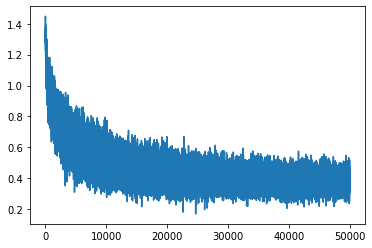

In [2]:
# Initialize the model parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)  # Character embedding
W1 = torch.randn((30, 200), generator=g)  # Hidden layer weights
b1 = torch.randn(200, generator=g)  # Hidden layer bias
W2 = torch.randn((200, 27), generator=g)  # Output layer weights
b2 = torch.randn(27, generator=g)  # Output layer bias
parameters = [C, W1, b1, W2, b2]

# Make parameters require gradients
for p in parameters:
    p.requires_grad = True

# Training loop
lre = torch.linspace(-3, 0, 1000)  # Learning rate candidates
lrs = 10 ** lre
lri, lossi, stepi = [], [], []  # Lists to store learning rates, losses, and steps

for i in range(50000):
    # Build a minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]  # Get character embeddings for the minibatch

    # Forward pass
    h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update parameters
    lr = 0.01  # Learning rate
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

# Plot the training loss
plt.plot(stepi, lossi)

In [4]:
# Evaluate the model on the development set
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(f"Development set loss: {loss.item()}")

Development set loss: 2.4220454692840576


In [6]:
# Sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range():
    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:  # If the end token is encountered, break the loop
            break

    print(''.join(itos[i] for i in out))

mruuahmanylieel.
ndheyah.
remursiend.
lek.
adeepdieliizeli.
